<a href="https://colab.research.google.com/github/EmmaCOo/ADS509_Sentiment_Analysis/blob/main/Assignment_6_1_Sentiment_Analysis_Emma_Oo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**ADS 509 Sentiment Analysis**

###**EMMA OO**

####10/07/2022


###**References for the positive word file and negative word file used in this assignment:**


Hu, M., & Liu, B. (2004, August). Mining and summarizing customer reviews. In Proceedings of the tenth ACM SIGKDD international conference on Knowledge discovery and data mining (pp. 168-177).


Liu, B., Hu, M., & Cheng, J. (2005, May). Opinion observer: analyzing and comparing opinions on the web. In Proceedings of the 14th international conference on World Wide Web (pp. 342-351).





This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard.

In [2]:
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=6e0d691943c31a1862536076acf83d40261895be0f03723682bd28c70bd7e100
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [3]:
#import libraries
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Add any additional import statements you need here

In [5]:
# change `data_location` to the location of the folder on your machine.
data_location = "/content/drive/MyDrive/M1 Results"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [6]:
positive_words_file = "/content/drive/positive-words.txt"
negative_words_file = "/content/drive/negative-words.txt"
tidy_text_file = "/content/drive/tidytext_sentiments.txt"

###**Data Input**

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.

In [7]:
# Read in the lyrics data

#lyrics Paths
artist = ['cher','robyn']

#lyrics folder path
lyrics_path = data_location+'/'+lyrics_folder

#artist folder path under lyrics folder
artist_path = os.listdir(lyrics_path)

artist_names = []  #to append the artist names
song_names = []  # to append the song names
lyrics = []  # to append the lyrics


for artist in artist_path:
  artist_folder = lyrics_path + artist  # specify each artist folder path such as 'path/lyrics/robyn' and 'path/lyrics/cher'
  songs = os.listdir(artist_folder)  # list each artist's songs

  for i in songs:
    song_path = artist_folder + '/' + i
    with open(song_path) as infile:
      location = infile.readlines()

    artist_names.append(artist)  # listing artist's name
    song_names.append(location[0])
    lyrics.append(''.join(location[1:]))

In [8]:
# Lyrics data frame
data = {'artist': artist_names, 'song_names': song_names, 'lyrics': lyrics} 

lyrics_df = pd.DataFrame(data)
lyrics_df.head(2)

,artist,song_names,lyrics
0,robyn,"""Bumpy Ride""\n",\n\n\nSometimes life can be a bumpy ride\nSome...
1,robyn,"""In My Heart""\n",\n\n\nHope things will get better 'cause that'...


####**To remove new lines \n from messy strings from the data frame**

In [9]:
lyrics_df = lyrics_df.replace(r'\n',' ', regex=True) 
lyrics_df.head(2)

,artist,song_names,lyrics
0,robyn,"""Bumpy Ride""",Sometimes life can be a bumpy ride Sometime...
1,robyn,"""In My Heart""",Hope things will get better 'cause that's w...


In [10]:
lyrics_soln = lyrics_df[['artist','song_names']]
lyrics_soln.head(2)

,artist,song_names
0,robyn,"""Bumpy Ride"""
1,robyn,"""In My Heart"""


In [11]:
# Read in the twitter data
#Twitter Paths

twitter_path = data_location+'/'+ twitter_folder

#artist folder path under lyrics folder
twitter_files = os.listdir(twitter_path)

# CHER
cher = pd.read_csv('/content/drive/MyDrive/M1 Results/twitter/cher_followers_data.txt', error_bad_lines = False, sep = '\t')

#Copy only ID and 'description' columns
cher_df = cher[['id','description']].copy()

#Adding Artist 'cher' column
cher_df['artist'] = 'cher'
cher_df.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 624: expected 7 fields, saw 12\nSkipping line 17506: expected 7 fields, saw 12\nSkipping line 104621: expected 7 fields, saw 12\n'
b'Skipping line 188924: expected 7 fields, saw 12\n'
b'Skipping line 301600: expected 7 fields, saw 12\n'
b'Skipping line 429936: expected 7 fields, saw 12\nSkipping line 444405: expected 7 fields, saw 12\n'
b'Skipping line 677792: expected 7 fields, saw 12\nSkipping line 773482: expected 7 fields, saw 12\n'
b'Skipping line 818258: expected 7 fields, saw 12\nSkipping line 895225: expected 7 fields, saw 12\n'
b'Skipping line 955213: expected 7 fields, saw 10\nSkipping line 994827: expected 7 fields, saw 12\n'
b'Skipping line 1246039: expected 7 fields, saw 12\n'
b'Skipping line 1569117: expected 7 fields, saw 

,id,description,artist
0,3.515221e+07,NaN,cher
1,7.421531e+17,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher


In [12]:
#ROBYN
robyn = pd.read_csv('/content/drive/MyDrive/M1 Results/twitter/robynkonichiwa_followers_data.txt', sep = '\t')
robyn_df = robyn[['id','description']].copy()

#Adding Artist 'robyn' column
robyn_df['artist'] = 'robyn'

#Combine two data frame as twitter_df
twitter_df = cher_df.append(robyn_df)
twitter_df = twitter_df.drop(columns = 'id', axis=0)
twitter_df.head()

,description,artist
0,NaN,cher
1,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,csu,cher
4,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [13]:
# Read in the positive and negative words and the tidytext sentiment. 

pos = pd.read_csv('/content/drive/MyDrive/positive-words.txt', encoding='ISO-8859-1',header= None)
neg = pd.read_csv("/content/drive/MyDrive/negative-words.txt",encoding='ISO-8859-1', header = None)
tidy = pd.read_csv('/content/drive/MyDrive/tidytext_sentiments.txt',sep="\t")

In [14]:
#quick look at pos 
pos.head(3)

,0
0,a+
1,abound
2,abounds


In [15]:
#add 'word' column for listed words
pos.columns = ['word']
neg.columns = ['word']

#add 'sentiment' column
pos['sentiment'] = 'positive'
neg['sentiment'] = 'negative'

In [16]:
#split pos and neg dataframes from tidy dataframe
pos_tidy = tidy[tidy['sentiment']=='positive']
neg_tidy = tidy[tidy['sentiment']=='negative']

#drop 'lexicom' column
pos_tidy = pos_tidy.drop(columns = 'lexicon')
neg_tidy = neg_tidy.drop(columns = 'lexicon')

In [17]:
#merge pos_tidy with pos dataframe
pos = pd.concat([pos,pos_tidy], ignore_index = True)
pos.shape

#merge neg_tidy with neg dataframe
neg = pd.concat([neg, neg_tidy], ignore_index = True)

#print shapes of dataframes
pos.shape, neg.shape

((6678, 2), (15244, 2))

In [18]:
#drop any duplicates
pos.drop_duplicates(keep=False, inplace= True)
neg.drop_duplicates(keep=False, inplace= True)

#print shapes after dropping duplicates
pos.shape, neg.shape

((1751, 2), (2794, 2))

In [19]:
#final positive sentiment dataframe  (the same format for the negative dataframe)
pos.head()

,word,sentiment
2006,abba,positive
2007,ability,positive
2008,abovementioned,positive
2009,absolute,positive
2010,absolution,positive


###**Sentiment Analysis on Songs**

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository.

After you have calculated these sentiments, answer the questions at the end of this section.

In [20]:
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in pos['word']:
        word_dict[word] = pos_score
        
# Adding the negative words to the dictionary
for word in neg['word']:
        word_dict[word] = neg_score
        
def sentiment_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words) 

In [21]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

lyrics_df['lyrics_sentiment_score'] = lyrics_df['lyrics'].apply(sentiment_score)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
lyrics_df.head()

,artist,song_names,lyrics,lyrics_sentiment_score
0,robyn,"""Bumpy Ride""",Sometimes life can be a bumpy ride Sometime...,0.009901
1,robyn,"""In My Heart""",Hope things will get better 'cause that's w...,0.000000
2,robyn,"""You've Got That Something""",Look at me here I am I'm givin all of my lo...,0.000000
3,robyn,"""Do You Know (What It Takes)""",Don't you know i can see what you're doing ...,0.016260
4,robyn,"""The Last Time""",Ever since I was a little girl even younger...,0.012887


In [23]:
#average score of each artist
lyrics_df.groupby('artist')['lyrics_sentiment_score'].mean()

artist
cher     0.011028
robyn    0.019786
Name: lyrics_sentiment_score, dtype: float64

####**Questions Q: Overall, which artist has the higher average sentiment per song?**

####**A:  Robyn has the higher mean score per song.**

In [24]:
#songs with highest and lowest sentiments

#split robyn dataset
robyn = lyrics_df[lyrics_df['artist'] == 'robyn']

#print highest sentiment songs
print("Robyn's Song with Highest Sentiment Score")
robyn[robyn['lyrics_sentiment_score'] == robyn['lyrics_sentiment_score'].max()]


Robyn's Song with Highest Sentiment Score


,artist,song_names,lyrics,lyrics_sentiment_score
97,robyn,"""Baby Forgive Me""","Here come the night In your eyes Baby, be b...",0.185185


In [25]:
print("Robyn's Song with Lowest Sentiment Score")
robyn[robyn['lyrics_sentiment_score'] == robyn['lyrics_sentiment_score'].min()]

Robyn's Song with Lowest Sentiment Score


,artist,song_names,lyrics,lyrics_sentiment_score
51,robyn,"""Anytime You Like""",It's like you're waiting for me to start Th...,-0.072727


####**Q: For your first artist, what songs have the highest and lowest sentiments? Print those songs to the screen.**

####**A: For Robyn, 'Baby Forgive Me' has higher sentiment score of 0.185185 and 'Anytime You Like' has the lowest sentiment score of -0.072727.**  

In [26]:
#songs with highest and lowest sentiments

#split cher dataset
cher = lyrics_df[lyrics_df['artist'] == 'cher']

#print highest sentiment songs
print("Cher's Song with Highest Sentiment Score")
cher[cher['lyrics_sentiment_score'] == cher['lyrics_sentiment_score'].max()]

Cher's Song with Highest Sentiment Score


,artist,song_names,lyrics,lyrics_sentiment_score
143,cher,"""Sing For Your Supper""",Sing for your supper And you'll get breakf...,0.111111


In [27]:
print("Cher's Song with Lowest Sentiment Score")
cher[cher['lyrics_sentiment_score'] == cher['lyrics_sentiment_score'].min()]

Cher's Song with Lowest Sentiment Score


,artist,song_names,lyrics,lyrics_sentiment_score
307,cher,"""Bang-Bang""",Bang bang you shot me down Bang bang I hit ...,-0.231579


####**Q: For your second artist, what songs have the highest and lowest sentiments? Print those songs to the screen.**

####**A: For Cher, 'Sing For Your Supper' has higher sentiment score of 0.11111 and 'Bang-Bang' has the lowest sentiment score of -0.231579.**  


####**Q: Plot the distributions of the sentiment scores for both artists. You can use seaborn to plot densities or plot histograms in matplotlib.**

####**A: According to the density plot, the density of Cher's neutral scores are slightly higher than Robyn's. Cher's song have more negative scores than Robyn's while Robyn's song have more positive scores than Cher's.**

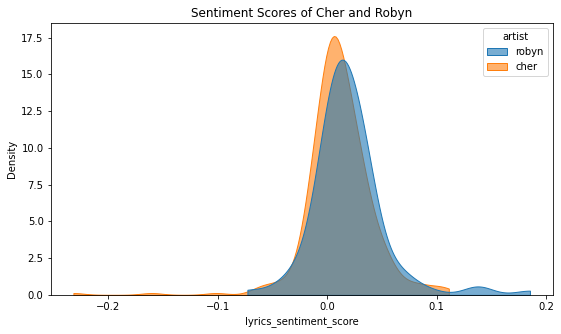

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
sns.kdeplot(data=lyrics_df, x="lyrics_sentiment_score", hue="artist", cut=0, fill=True, common_norm=False, alpha= 0.6)
plt.title("Sentiment Scores of Cher and Robyn")
plt.show()

###**Sentiment Analysis on Twitter Descriptions**

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at the emojitracker.

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers.

In [29]:
#create positive emoji
pos_emojis = { "\U0001f600", "\U0001F601", 	'\U0001F60A', '\U0001F607', '\U0001F970', '\U0001F60D', '\U0001F618', '\U0001F60D', '\U0001F60B', '\U0001F61C',
              '\U0001F92A', '\U0001F61D','\U0001F911', '\U0001F61C','\U0001F917','\U0001F92D','\U0001F61C','\U0001F60E', '\U0001F61C', '\U0001F49D', '\U0001F61C', '\U0001F61C', 
              '\U0001F48F', '\U0001F913', '\U0001F92A', '\U0001F619', '\U0001F64C', '\U0001F44F', '\U0001F973', '\U0001F929','\U0001F60A' }

In [30]:
print(pos_emojis)

{'😁', '😋', '🥰', '😝', '🥳', '🙌', '🤗', '😍', '😊', '👏', '😀', '🤭', '🤓', '😇', '🤩', '😜', '💝', '💏', '😘', '😎', '🤪', '😙', '🤑'}


In [31]:
#create negative emojis
neg_emojis = { '\U0001F62A', '\U0001F637', '\U0001F912', '\U0001F915', '\U0001F922', '\U0001F92E', '\U0001F927', '\U0001F975', '\U0001F615', '\U0001F61F', '\U0001F641', 
              '\U0001F641', '\U0001F62E', '\U0001F62F', '\U0001F632', '\U0001F97A', '\U0001F622', '\U0001F630', '\U0001F625', '\U0001F62D', '\U0001F616', 
              '\U0001F61E', '\U0001F613', '\U0001F624', '\U0001F621', '\U0001F92C', '\U0001F494', '\U0001F44E', '\U0001F498'}

In [32]:
print(neg_emojis)

{'😮', '😷', '😤', '🤧', '👎', '😲', '😭', '🤒', '😖', '💔', '😞', '😓', '😡', '😰', '😯', '😕', '😥', '🤢', '😪', '🤬', '💘', '🤕', '🥺', '🙁', '😢', '🥵', '🤮', '😟'}


In [33]:
#create emoji_dict
pos_emoji_score = 1
neg_emoji_score = -1
emoji_dict = {}

# Adding the positive words to the dictionary
for e in pos_emojis:
        emoji_dict[e] = pos_emoji_score
        
# Adding the negative words to the dictionary
for i in neg_emojis:
  emoji_dict[i] = neg_score

In [34]:
#define sentiment_score for text
def sentiment_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    if float(len(bag_of_words)) !=0:
      return sentiment_score / float(len(bag_of_words))
    else:
          return 0

#define sentiment_score for emojis
def emoji_score(text):
    emoji_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in emoji_dict:
            emoji_score += emoji_dict[word]
    if float(len(bag_of_words)) !=0:
      return emoji_score / float(len(bag_of_words))
    else:
          return 0

In [35]:
#change description to string type
twitter_df['description'] = twitter_df['description'].apply(str)

In [36]:
#Fill na with na values
twitter_df['description'] = twitter_df['description'].fillna('na')

#Add sentiment_score column
twitter_df['sentiment_score'] = twitter_df['description'].apply(sentiment_score)

#Add emoji_score column
twitter_df['emoji_score'] = twitter_df['description'].apply(emoji_score)


In [37]:
#total scores
twitter_df['total_score'] = twitter_df['sentiment_score'] + twitter_df['emoji_score']

In [38]:
twitter_df.head()

,description,artist,sentiment_score,emoji_score,total_score
0,nan,cher,0.000000,0.0,0.000000
1,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,0.000000,0.0,0.000000
2,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,0.000000,0.0,0.000000
3,csu,cher,0.000000,0.0,0.000000
4,Writer @Washinformer @SpelmanCollege alumna #D...,cher,0.111111,0.0,0.111111


In [39]:
#Average sentiment score for each artist
twitter_df.groupby('artist')['total_score'].mean()

artist
cher     0.014808
robyn    0.016690
Name: total_score, dtype: float64

####**Q: What is the average sentiment of your two artists?**

####**A: For Cher, it's 0.014808 and 0.016690 for Robyn.**


###**To work on Emoji Question:**

In [40]:
#Split Cher and Robyn dataset
cher_twit = twitter_df[twitter_df['artist'] == 'cher']
robyn_twit = twitter_df[twitter_df['artist'] == 'robyn']

In [41]:
#for tokenization:
RE_TOKEN = re.compile(r"""
                   ( [#]?[@\w'’\.\-\:]*\w     # words, hashtags and email addresses
                   | [:;<]\-?[\)\(3]          # coarse pattern for basic text emojis
                   | [\U0001F100-\U0001FFFF]  # coarse code range for unicode emojis
                   )
                  """, re.VERBOSE)

def tokenize(text):
  return text.split()

In [42]:
#Tokenize the description
cher_twit['tokens'] = cher_twit['description'].apply(tokenize)
robyn_twit['tokens'] = robyn_twit['description'].apply(tokenize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
#Cher's positive emojis
cher_pos_emojis = []
for token in cher_twit['tokens']:
  for i in token:
    if i in pos_emojis:
      cher_pos_emojis.append(i)

#Cher's negative emojis
cher_neg_emojis = []
for token in cher_twit['tokens']:
  for i in token:
    if i in neg_emojis:
      cher_neg_emojis.append(i)

#Robyn's positive emojis
robyn_pos_emojis = []
for token in robyn_twit['tokens']:
  for i in token:
    if i in pos_emojis:
      robyn_pos_emojis.append(i)

#Robyn's negative emojis
robyn_neg_emojis = []
for token in robyn_twit['tokens']:
  for i in token:
    if i in neg_emojis:
      robyn_neg_emojis.append(i)

In [44]:
#Cher
cher_count = Counter(cher_pos_emojis)
print('Most Popular Positive Emojis for Cher')
print(cher_count.most_common(10))

cher_neg_count = Counter(cher_neg_emojis)
print('Most Popular Negative Emojis for Cher')
print(cher_neg_count.most_common(10))

#Robyn
robyn_count = Counter(robyn_pos_emojis)
print('Most Popular Positive Emojis for Robyn')
print(robyn_count.most_common(10))

robyn_neg_count = Counter(robyn_neg_emojis)
print('Most Popular Negative Emojis for Robyn')
print(robyn_neg_count.most_common(10))

Most Popular Positive Emojis for Cher
[('😊', 1696), ('😎', 1551), ('😍', 1472), ('🥰', 1212), ('😘', 1119), ('😁', 899), ('🤓', 790), ('😜', 664), ('😀', 560), ('🤗', 529)]
Most Popular Negative Emojis for Cher
[('😷', 684), ('💘', 445), ('💔', 331), ('🥺', 195), ('😭', 112), ('😡', 93), ('🤬', 85), ('🥵', 73), ('😢', 72), ('😤', 72)]
Most Popular Positive Emojis for Robyn
[('😎', 95), ('🤓', 77), ('😊', 72), ('🥰', 54), ('😍', 51), ('😘', 45), ('😁', 36), ('😜', 36), ('🙌', 26), ('😋', 23)]
Most Popular Negative Emojis for Robyn
[('😷', 22), ('💘', 19), ('💔', 14), ('🥺', 12), ('😭', 5), ('👎', 4), ('🤬', 4), ('🤮', 4), ('😮', 3), ('😡', 3)]


####**Q: Which positive emoji is the most popular for each artist? Which negative emoji?**

####**A:  For Cher, 😊 is the top positive emoji and 😷 is the top negative emoji.**

####**For Robyn, 😎 is the top positive emoji and 😷 is the top negative emoji.**

